In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import tqdm
import time
from datetime import datetime
import random 
import numpy as np
random.seed(42)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('Visits_20220115.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (1,232) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.shape

(35813, 233)

In [4]:
df['visit_id'][df['test_Type_max'].isna()].count()

18728

In [5]:
df.head(2)

visit_id   visitor_id  \
0  01590593188507329154534331254419041761-20  1.59059E+36   
1  01593486178240981991706573422938967170-10  1.59349E+36   

   cart_session_id_dist_cnt  checkout_exists  checkout_cnt  cart_visit_exists  \
0                         4                1            15                  1   
1                         2                1             3                  1   

   cart_visit_cnt  orderstq_exsits  orderstq_cnt  order_id_cnt_dist  \
0              14                0             0                  0   
1               3                0             0                  0   

   cart_abandoned  abandoned_cart_cnt event_date_max device_type_max  \
0               1                   4     2022-01-15         Desktop   
1               1                   2     2022-01-15         Desktop   

   device_type_cnt_dist  visit_page_seq_min  visit_page_seq_max  \
0                     1                  37                 131   
1                     1                   1                 141   

   visit_page_seq_cnt  perc_pageview_page_event  perc_click_page_event  \
0                  94                         0                      0   
1                 138                         0                      0   

   perc_no_page_event  perc_other_page_event  pageview_page_event_cnt  \
0                   0                      0                       28   
1                   0                      0                       19   

   click_page_event_cnt  no_page_event_cnt  other_page_event_cnt  \
0                    66                  0                     0   
1                   119                  0                     0   

   page_name_cnt  page_name_cnt_dist           entry_page_name  \
0             94                  94  new ecom step1|view cart   
1            138                 138       www.uofl2022.org/us   

                                      exit_page_name  page_name_v2_cnt  \
0                           new ecom step1|view cart                23   
1  https://www.uofl2022.org/us/smartphones/galaxy...                19   

   page_name_v2_cnt_dist entry_page_name_v2 exit_page_name_v2  \
0                     23                NaN               NaN   
1                     19               home               NaN   

   product_id_cnt_dist  cid_cnt_dist  is_logged_in_flag_max  \
0                    4             0                      1   
1                    1             1                      1   

   is_logged_in_flag_perc   event_time_est_min   event_time_est_max  \
0                       0  01/15/2022 00:00:17  01/15/2022 00:13:02   
1                       0  01/15/2022 13:16:09  01/15/2022 13:51:16   

  visit_session_time                    referrer_max  referrer_cnt_dist  \
0           00:12:45  https://www.uofl2022.org/us/we                  5   
1           00:35:07  https://www.uofl2022.org/us/we                  7   

   bounce_max  bounce_avg  entry_page_max  exit_page_max  va_closer_id_max  \
0           0           0               1              1                 5   
1           0           0               1              1                 2   

  program_max  program_cnt_dist referral_max  referral_cnt_dist  \
0         NaN                 0          NaN                  0   
1         NaN                 0   google.com                  1   

      channel_max  channel_cnt_dist last_touch_channel_max  \
0          direct                 1                 direct   
1  natural search                 1         natural search   

   last_touch_channel_cnt_dist  entry_page_seq_avg visit_entry_channel_max  \
0                            1                  39                  direct   
1                            1                   1          natural search   

  visit_entry_channel_c360_max  b2c_flag_avg  checkout_flag_avg  link_cat_cnt  \
0                       direct             1                  0            63   
1                  paid search             1              

In [6]:
df['visit_session_time'] = df['visit_session_time'].str.slice(0,2).astype(int)*60 + df['visit_session_time'].str.slice(3,5).astype(int) + df['visit_session_time'].str.slice(7,9).astype(int)/60

In [7]:
df.shape

(35813, 233)

In [8]:
df['target'] = df['cart_abandoned']

In [9]:
#df['target'] = df['abandoned_cart_cnt']/df['cart_session_id_dist_cnt']

In [10]:
keepcols = [
    'target', 'checkout_cnt', 
    'exit_page_name_v2', 'checkout_exists', 
    'product_id_max', 'exit_link_cat','visit_session_time', 
    'product_id_cnt_dist', 'test_Type_max', 'exit_page_type', 'entry_page_name_v2', 'site_txmy2_max',
    'nth_visit_of_visitor', 'referrer_max',
    'click_depth', 'cart_visit_cnt']

df = df[keepcols]

In [11]:
# dropcols = [
#     'cart_abandoned', 
#     'abandoned_cart_cnt', 
#     'event_time_est_min',
#     'event_time_est_max',
#     'visit_id',
#     'visitor_id',
#     'visit_id_day',
#     'product_modelcode_max',
#     'event_time_max',
    
#     'orderstq_exsits',
#     'orderstq_cnt', 
#     'order_id_cnt_dist', 
#     'event_date_max', 
    
#     'click_on_place_order_button',
#     'Orders_xaa',
#     'Orders_tmo2',
#     'Orders_tmo',
#     'Orders_att',
#     'Orders_vzw',
#     'enter_new_credit_CC',

#     'enter_zip_code',
#     'enter_state',
#     'change_shipping_address',
#     'error_message_checkout',
#     'payment_details_complete',
#     'enter_credit_card_details',
#     'click_on_cvv_tooltip',
#     'add_Credit_Card',

#     'paypal_success', 
#     'payment_paypal',
# ] + [
#     'exit_page_name', 'paymentmethod_cnt_dist', 'checkout_cnt', 'finalpayment_cnt_dist', 'exit_page_max'] + [
#     'exit_page_name_v2', 'exit_event_name', 'checkout_exists', 'Checkout', 'wallet_card'] + [
#     'product_id_max', 'exit_link_id', 'exit_link_cat', 'entry_page_name', 'visit_session_time'] + [
#     'product_id_cnt_dist', 'test_Type_max', 'exit_page_type', 'entry_page_name_v2', 'site_txmy2_max'] + [
#     'nth_visit_of_visitor', 'event_name_cnt_dist', 'event_name_cnt', 'referrer_max', 'entry_link_id']

# df = df.drop(columns = dropcols)

In [12]:
df.shape

(35813, 16)

In [13]:
df.shape

(35813, 16)

In [14]:
### Get list of continuous variables and cat variables

cat_vars = []
cont_vars = []
for i in df.drop(columns='target').columns:
    if df[i].dtype=='object':
        cat_vars.append(i)
    else:
        cont_vars.append(i) #Even binary vars are considered as continuous vars. Further they will be descritized
        

### For each column in df, if categorical and NAN, replace with string NAN, if continuous and NAN then replace with 100X of the max value

In [15]:
# for i, j in dict(df.dtypes).items():
#     if j=='object':
#         df.loc[df[i].isna(), i] = 'No available'
#     else:
#         df.loc[df[i].isna(), i] = df[i].max()*10
    

In [16]:
for i in cat_vars:
    df.loc[df[i].isna(), i] = 'Not available'

for i in cont_vars:
    df.loc[df[i].isna(), i] = df[i].max()*10

    

In [17]:
df[cat_vars].describe()

exit_page_name_v2  product_id_max  exit_link_cat  test_Type_max  \
count              35813           35813          35813          35813   
unique               711            2239            327              7   
top        Not available  SM-R177NZKAXAR  Not available  Not available   
freq               26216             851           9760          18728   

       exit_page_type entry_page_name_v2 site_txmy2_max nth_visit_of_visitor  \
count           35813              35813          35813                35813   
unique             58               1638            195                 1749   
top     Not available      Not available            tvs                    1   
freq            26709              10495           9767                 4856   

                          referrer_max  
count                            35813  
unique                             197  
top     https://www.uofl2022.org/us/we  
freq                             10415

In [18]:
df[cont_vars].describe()

checkout_cnt  checkout_exists  visit_session_time  product_id_cnt_dist  \
count  35813.000000      35813.00000        35813.000000         35813.000000   
mean       4.856281          0.51808           15.772982             2.174601   
std        9.423561          0.49968           24.763647             2.213017   
min        0.000000          0.00000            0.000000             1.000000   
25%        0.000000          0.00000            1.150000             1.000000   
50%        1.000000          1.00000            7.050000             1.000000   
75%        6.000000          1.00000           20.100000             3.000000   
max      261.000000          1.00000          568.150000            60.000000   

        click_depth  cart_visit_cnt  
count  35813.000000    35813.000000  
mean       0.279707        4.163963  
std        0.207945        9.181633  
min        0.000000        0.000000  
25%        0.147059        0.000000  
50%        0.220472        0.000000  
75%        0.333333        5.000000  
max        1.000000      550.000000

### Modeling

In [19]:
fin_result = pd.DataFrame(columns = ["Model", "Train_accuracy","Train_precision","Train_recall", "Train_f1","Test_accuracy", 
                      "Test_precision","Test_recall", "Test_f1", "Top_1_explainer", "Top_2_explainer", "Top_3_explainer", "Top_4_explainer", "Top_5_explainer"])

## Print Accuracies function

In [20]:
import sklearn.metrics as metrics
def prt_acc(y_train, y_test, pred_tr, pred):
    test_acc = metrics.accuracy_score(y_test, pred)
    test_prec = metrics.precision_score(y_test, pred)
    test_recall = metrics.recall_score(y_test, pred)
    test_f1 = metrics.f1_score(y_test, pred)

    train_acc = metrics.accuracy_score(y_train, pred_tr)
    train_prec = metrics.precision_score(y_train, pred_tr)
    train_recall = metrics.recall_score(y_train, pred_tr)
    train_f1 = metrics.f1_score(y_train, pred_tr)

    print("*******************")
    print("*******************")
    print("Accuracy Test", test_acc)
    print("precision Test", test_prec)
    print("Recall Test", test_recall)
    print("F1 Test", test_f1)

    print("*******************")

    print("Accuracy Train", train_acc)
    print("precision Train", train_prec)
    print("Recall Train", train_recall)
    print("F1 Train", train_f1)

    return [train_acc, train_prec, train_recall, train_f1, test_acc, test_prec, test_recall, test_f1]

### Target Encode and get Individual variable importances

In [21]:
import random
random.seed(42)

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
X_data = df[cont_vars+cat_vars]
y_data = df['target']

print(X_data.shape)

(35813, 15)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data , test_size = 0.3)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = list(y_train)
y_test=list(y_test)

print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(25069, 15) (10744, 15) 25069 10744


In [25]:
import sys

In [26]:
from category_encoders import *

In [27]:
X_train_for_dt = X_train.copy()
X_test_for_dt = X_test.copy()


In [28]:
cat_vars_1 = [i for i in cat_vars]
enc_sale = TargetEncoder(cols=cat_vars_1)
X_train[cat_vars_1] = enc_sale.fit_transform(X_train[cat_vars_1], y_train)
X_test[cat_vars_1] = enc_sale.transform(X_test[cat_vars_1])

C:\Users\y0hire01\AppData\Roaming\Python\Python37\site-packages\category_encoders\target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
C:\Users\y0hire01\AppData\Roaming\Python\Python37\site-packages\category_encoders\target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [29]:
mdl="rf_Target_enc"
X_train_data = X_train.copy()
X_test_data = X_test.copy()

In [30]:
# acct = range(X_train_data.shape[0])

# acct_sample = random.sample(acct, 10000)
# X_train_data = X_train_data.iloc[acct_sample]

# y_train_temp = [y_train[i] for i in acct_sample]

In [31]:
# start = time.time()

# #hyper paramter tuning 
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # define models and parameters
# model = RandomForestClassifier()
# n_estimators = [10, 50, 100, 500]
# max_features = ['sqrt', 'log2']
# criterion = ['gini', 'entropy']
# min_samples_split = [2, 4, 6, 100]
# min_samples_leaf = [2, 4, 6, 100]
# oob_score = [True, False]
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features, criterion=criterion, 
#             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, oob_score=oob_score)
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
# grid_result = grid_search.fit(X_train_data, y_train_temp)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# end = time.time()
# print("Time taken...", (end-start)/60, "minutes")


In [32]:
mdl="rf_Target_enc"
X_train_data = X_train.copy()
X_test_data = X_test.copy()

In [33]:
start = time.time()
# params = {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 10, 'oob_score': False}
params = {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'oob_score': False}

# model training
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**params)
rf.fit(X_train_data, y_train)
pred = rf.predict(X_test_data)
pred_tr = rf.predict(X_train_data)

accs = prt_acc(y_train, y_test, pred_tr, pred)

# plot ROC curve
# from yellowbrick.classifier import ROCAUC
# logreg_roc = ROCAUC(rf)

# logreg_roc.fit(X_train_data, y_train)
# logreg_roc.score(X_test_data, y_test)
# logreg_roc.poof()

end = time.time()
print("Time taken...", (end-start)/60, "minutes")


*******************
*******************
Accuracy Test 0.9501116902457185
precision Test 0.9571122230164403
Recall Test 0.9877753187901781
F1 Test 0.9722020537288663
*******************
Accuracy Train 0.9952929913438908
precision Train 0.9953580603001487
Recall Train 0.999321297678838
F1 Train 0.9973357417024159
Time taken... 0.28568000396092735 minutes


In [34]:
feature_imp=rf.feature_importances_, 
feature = X_train_data.columns
feature_imp_df = pd.DataFrame(feature)
feature_imp_df.columns = ['feature']
feature_imp_df['imp'] = feature_imp[0]
feature_imp_df=feature_imp_df.sort_values('imp', ascending=False).reset_index().drop(columns='index')

fts = list(feature_imp_df[0:5]["feature"].values)

temp=pd.DataFrame()
temp = temp.append([[mdl] + accs + fts], ignore_index=True)
print()
temp.columns = ["Model", "Train_accuracy","Train_precision","Train_recall", "Train_f1","Test_accuracy", 
                      "Test_precision","Test_recall", "Test_f1", "Top_1_explainer", "Top_2_explainer", "Top_3_explainer", "Top_4_explainer", "Top_5_explainer"]


fin_result = fin_result.append(temp)
fin_result

Model  Train_accuracy  Train_precision  Train_recall  Train_f1  \
0  rf_Target_enc        0.995293         0.995358      0.999321  0.997336   

   Test_accuracy  Test_precision  Test_recall   Test_f1 Top_1_explainer  \
0       0.950112        0.957112     0.987775  0.972202    checkout_cnt   

     Top_2_explainer Top_3_explainer Top_4_explainer  Top_5_explainer  
0  exit_page_name_v2   exit_link_cat  product_id_max  checkout_exists

In [35]:
fin_result.to_clipboard()

In [36]:
feature_imp_df.to_clipboard()

In [37]:
import shap

In [38]:
#https://github.com/slundberg/shap/issues/2149 
#pip install numba==0.53.1 --user

In [39]:
# 'enter_state' - Enter which state in the billing information - Event in this stage there is 27% CAR. Why?


In [40]:
X_test_summary = shap.sample(X_test, 100)

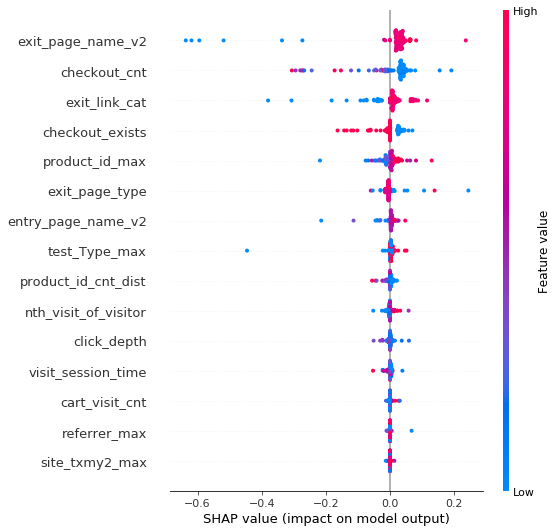

In [41]:
# Explain in iteration n=K in summary
explainer = shap.KernelExplainer(rf.predict, X_test_summary, keep_index=True)
shap_values = explainer.shap_values(X_test_summary)

shap.summary_plot(shap_values, X_test_summary)

In [35]:
df['cnt'] = 1

In [36]:
temp = df.groupby(['cart_visit_cnt']).aggregate({'cnt':'count','target':'mean'}).reset_index()
temp

cart_visit_cnt    cnt    target
0                 0  18230  0.936478
1                 1   2162  0.957447
2                 2   2147  0.866325
3                 3   2093  0.851887
4                 4   1658  0.822075
..              ...    ...       ...
107             163      1  0.000000
108             170      1  0.000000
109             185      1  1.000000
110             245      1  1.000000
111             550      1  1.000000

[112 rows x 3 columns]

In [ ]:
temp = df.groupby(['cart_visit']).aggregate({'cnt':'count','target':'mean'}).reset_index()
temp

import seaborn as sns

sns.relplot(
    data=temp, kind="line",
    x="event_time_est_max", y="target",
    facet_kws=dict(sharex=False),
)

## Decision Tree for analysis

In [49]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [43]:
feature_imp_df['feature'].values

array(['checkout_cnt', 'exit_page_name_v2', 'exit_link_cat',
       'product_id_max', 'checkout_exists', 'visit_session_time',
       'product_id_cnt_dist', 'click_depth', 'test_Type_max',
       'entry_page_name_v2', 'nth_visit_of_visitor', 'cart_visit_cnt',
       'site_txmy2_max', 'exit_page_type', 'referrer_max'], dtype=object)

### Decision tree with top 5 important variables

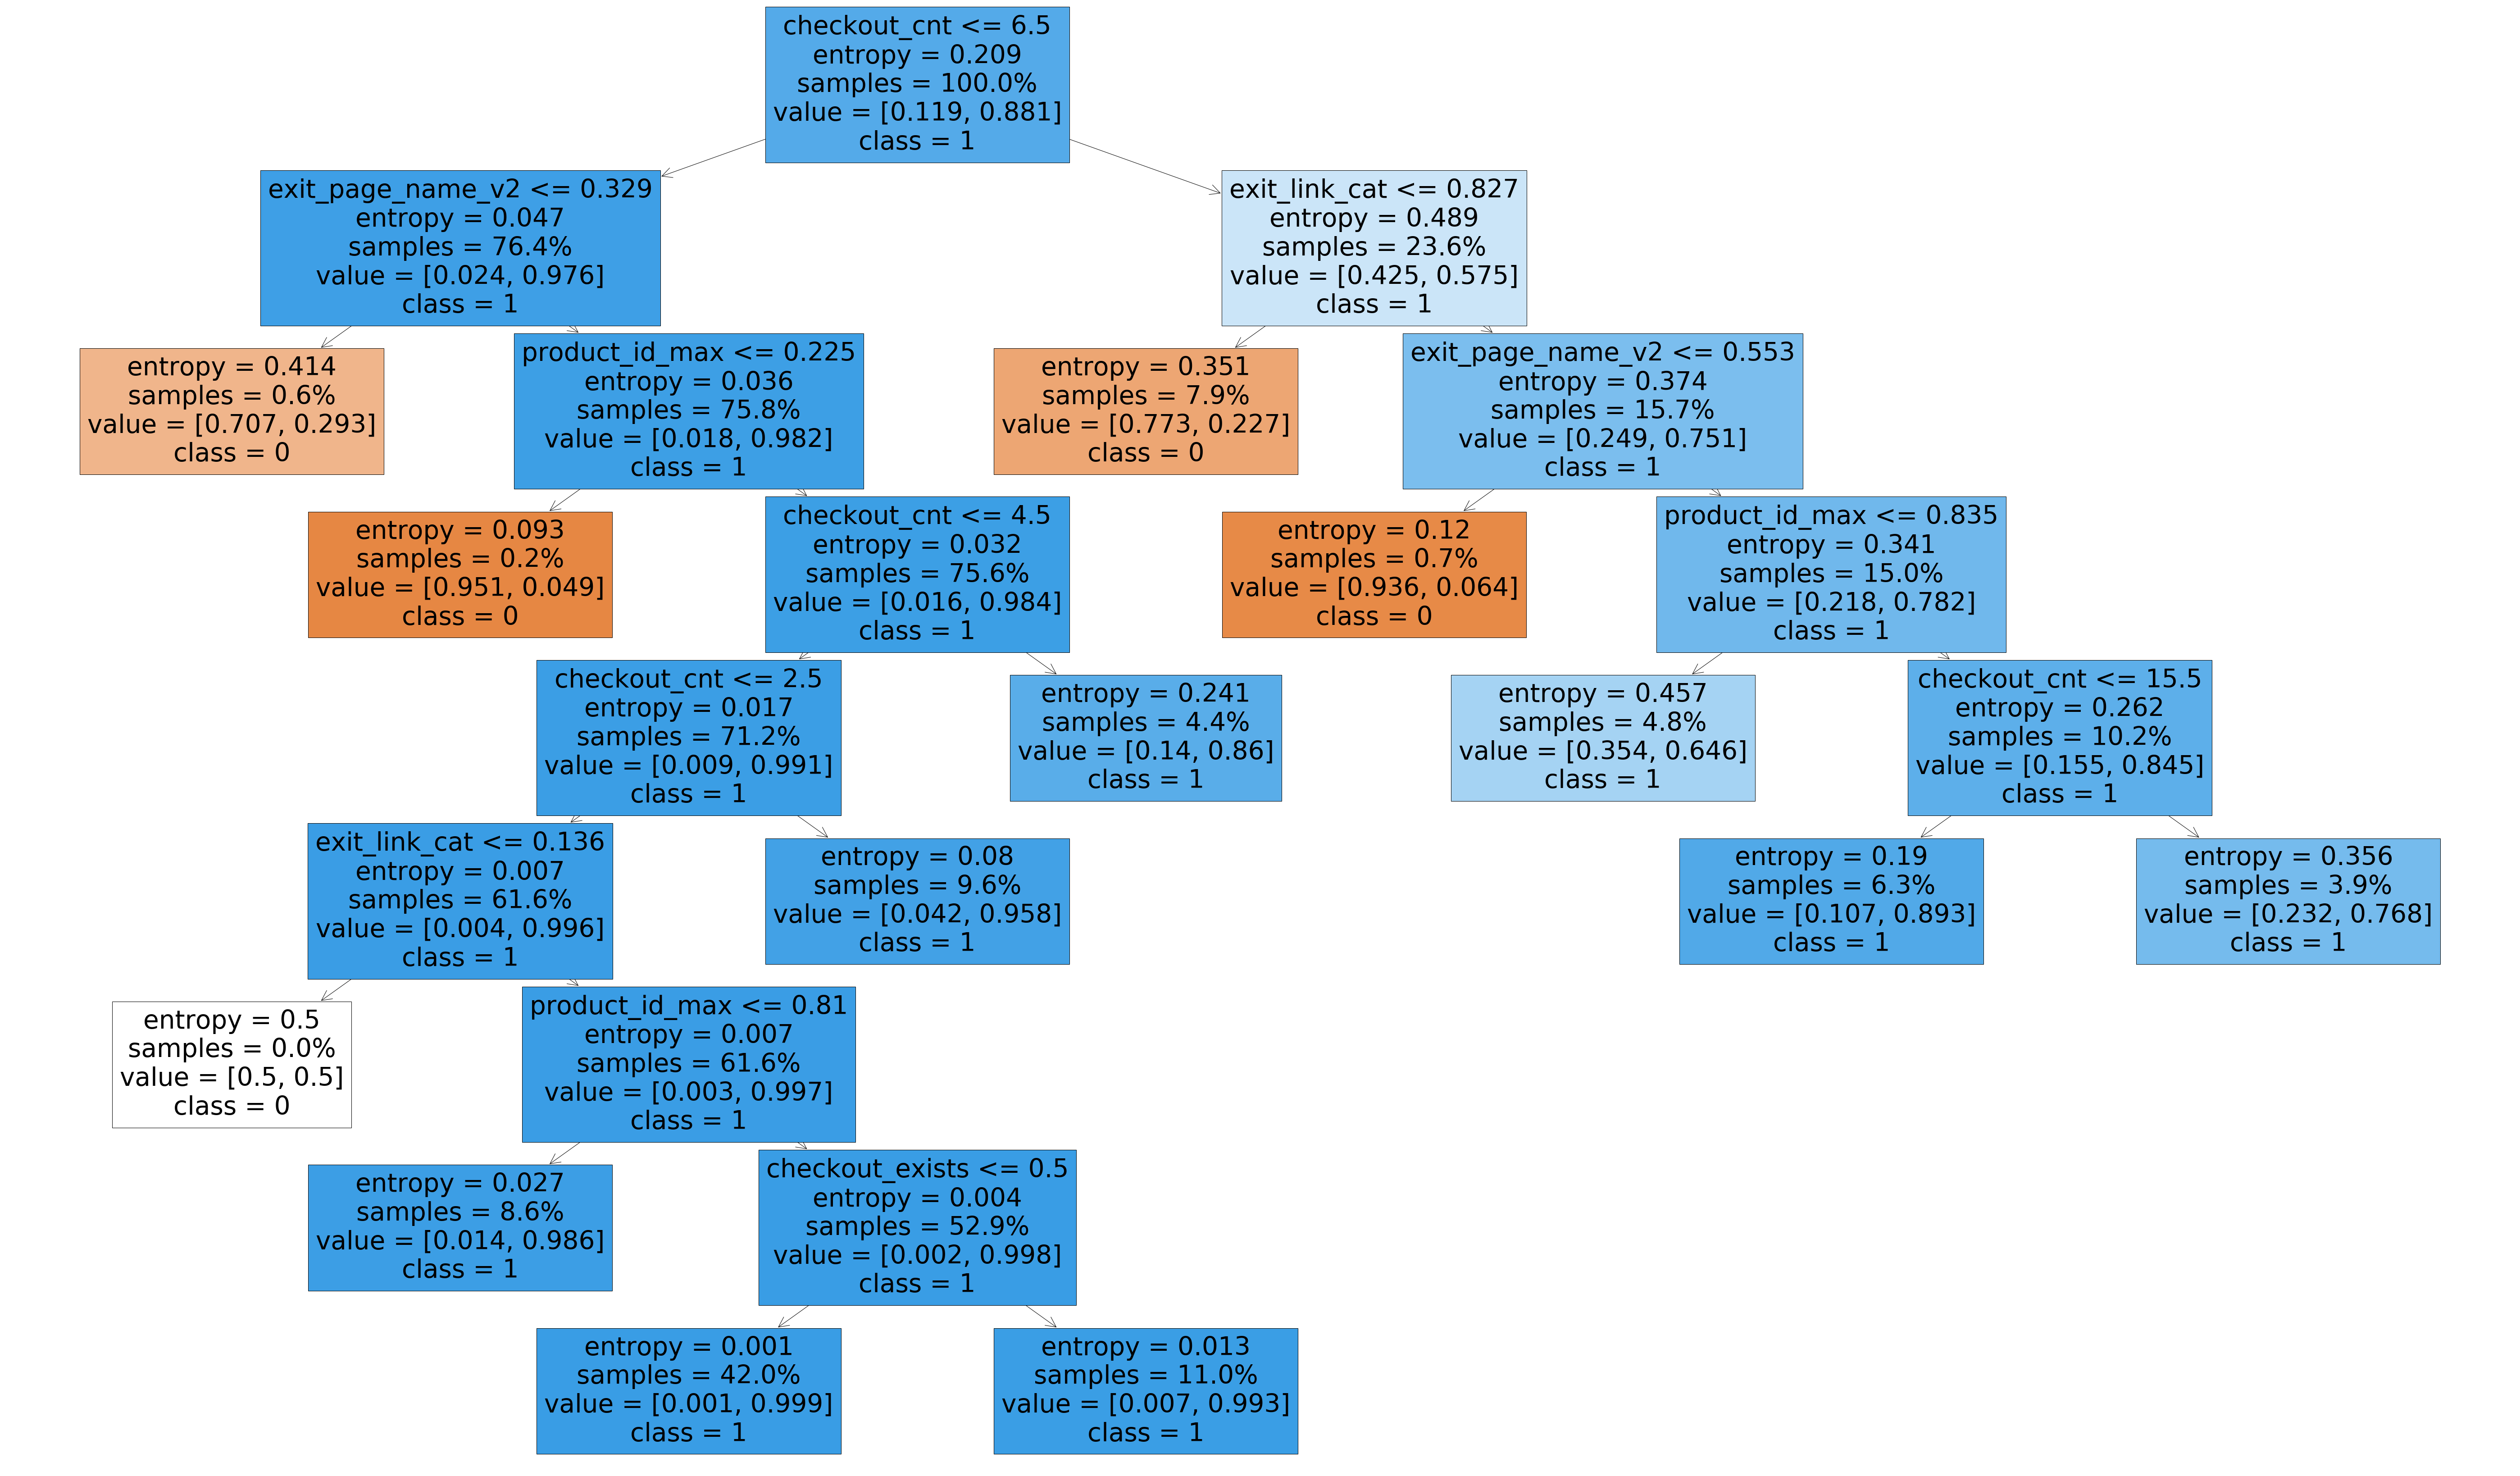

In [44]:
feature_imp_df['feature'][0:5].values

req_cols = feature_imp_df['feature'][0:5].values

# Prepare the data data
X = X_train[req_cols]
y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)


### Decision tree with top click depth and session time

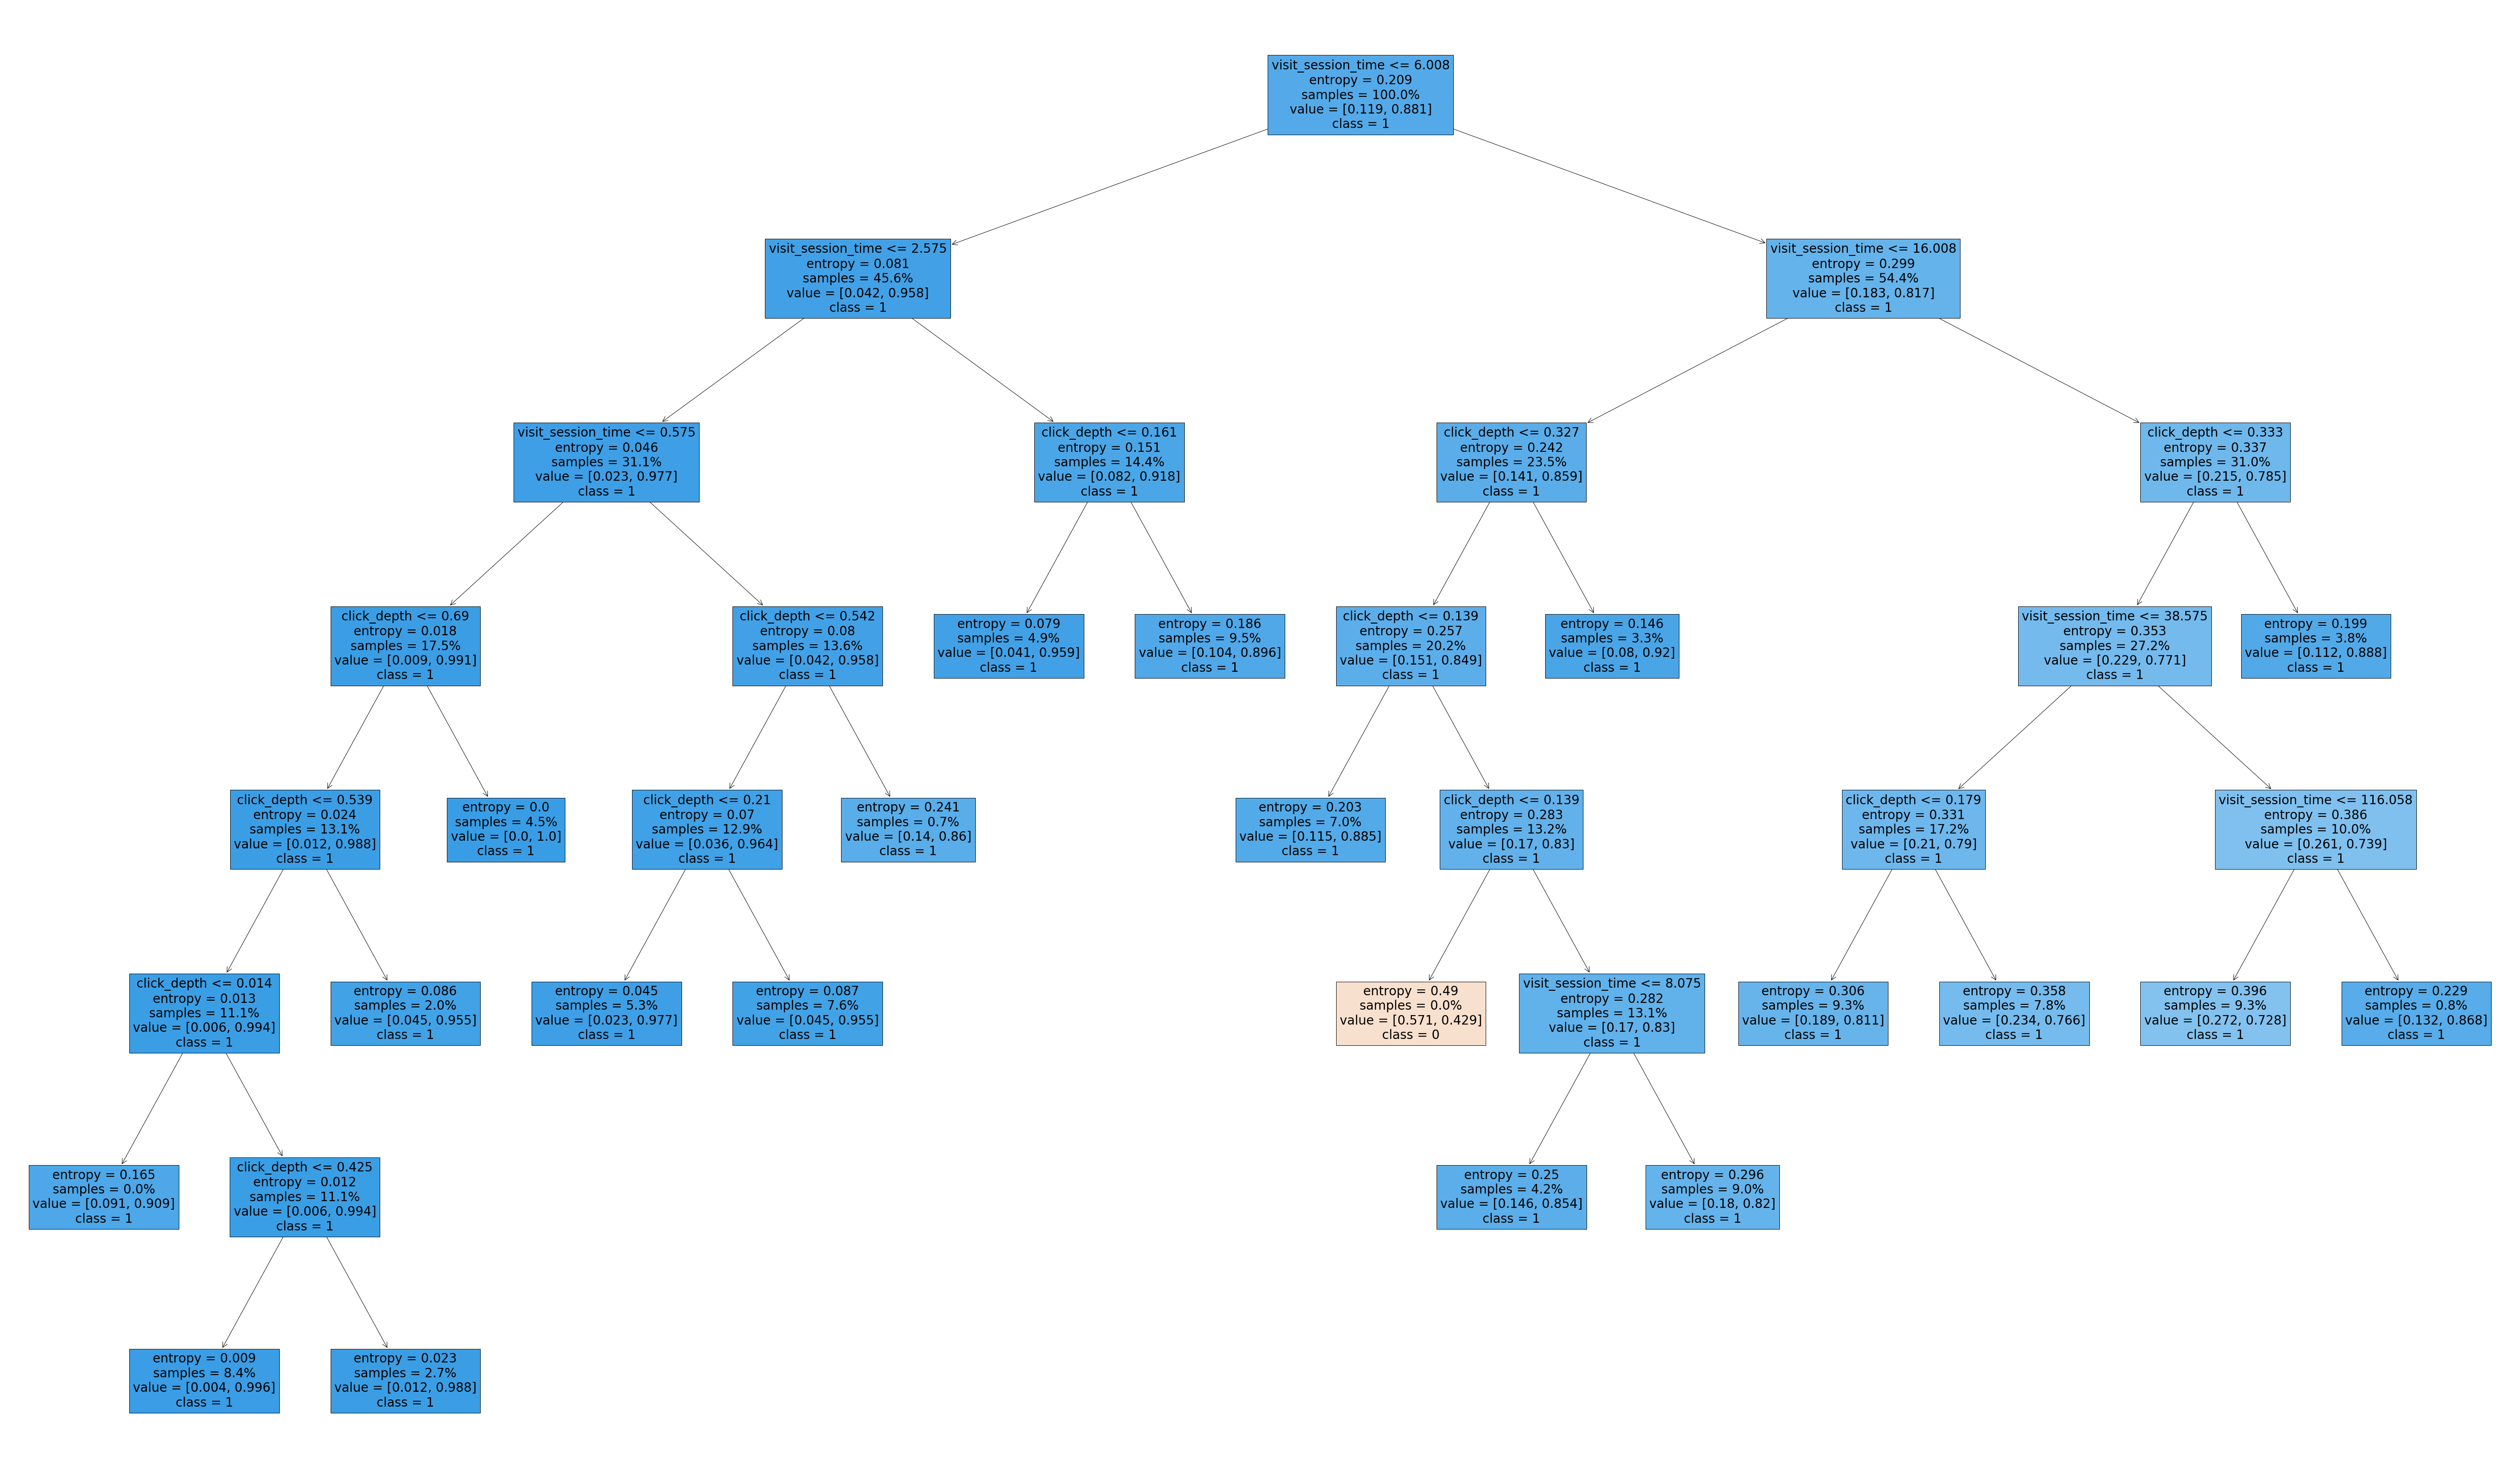

In [45]:
feature_imp_df['feature'][0:5].values

req_cols = ['click_depth', 'visit_session_time']

# Prepare the data data
X = X_train[req_cols]
y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)


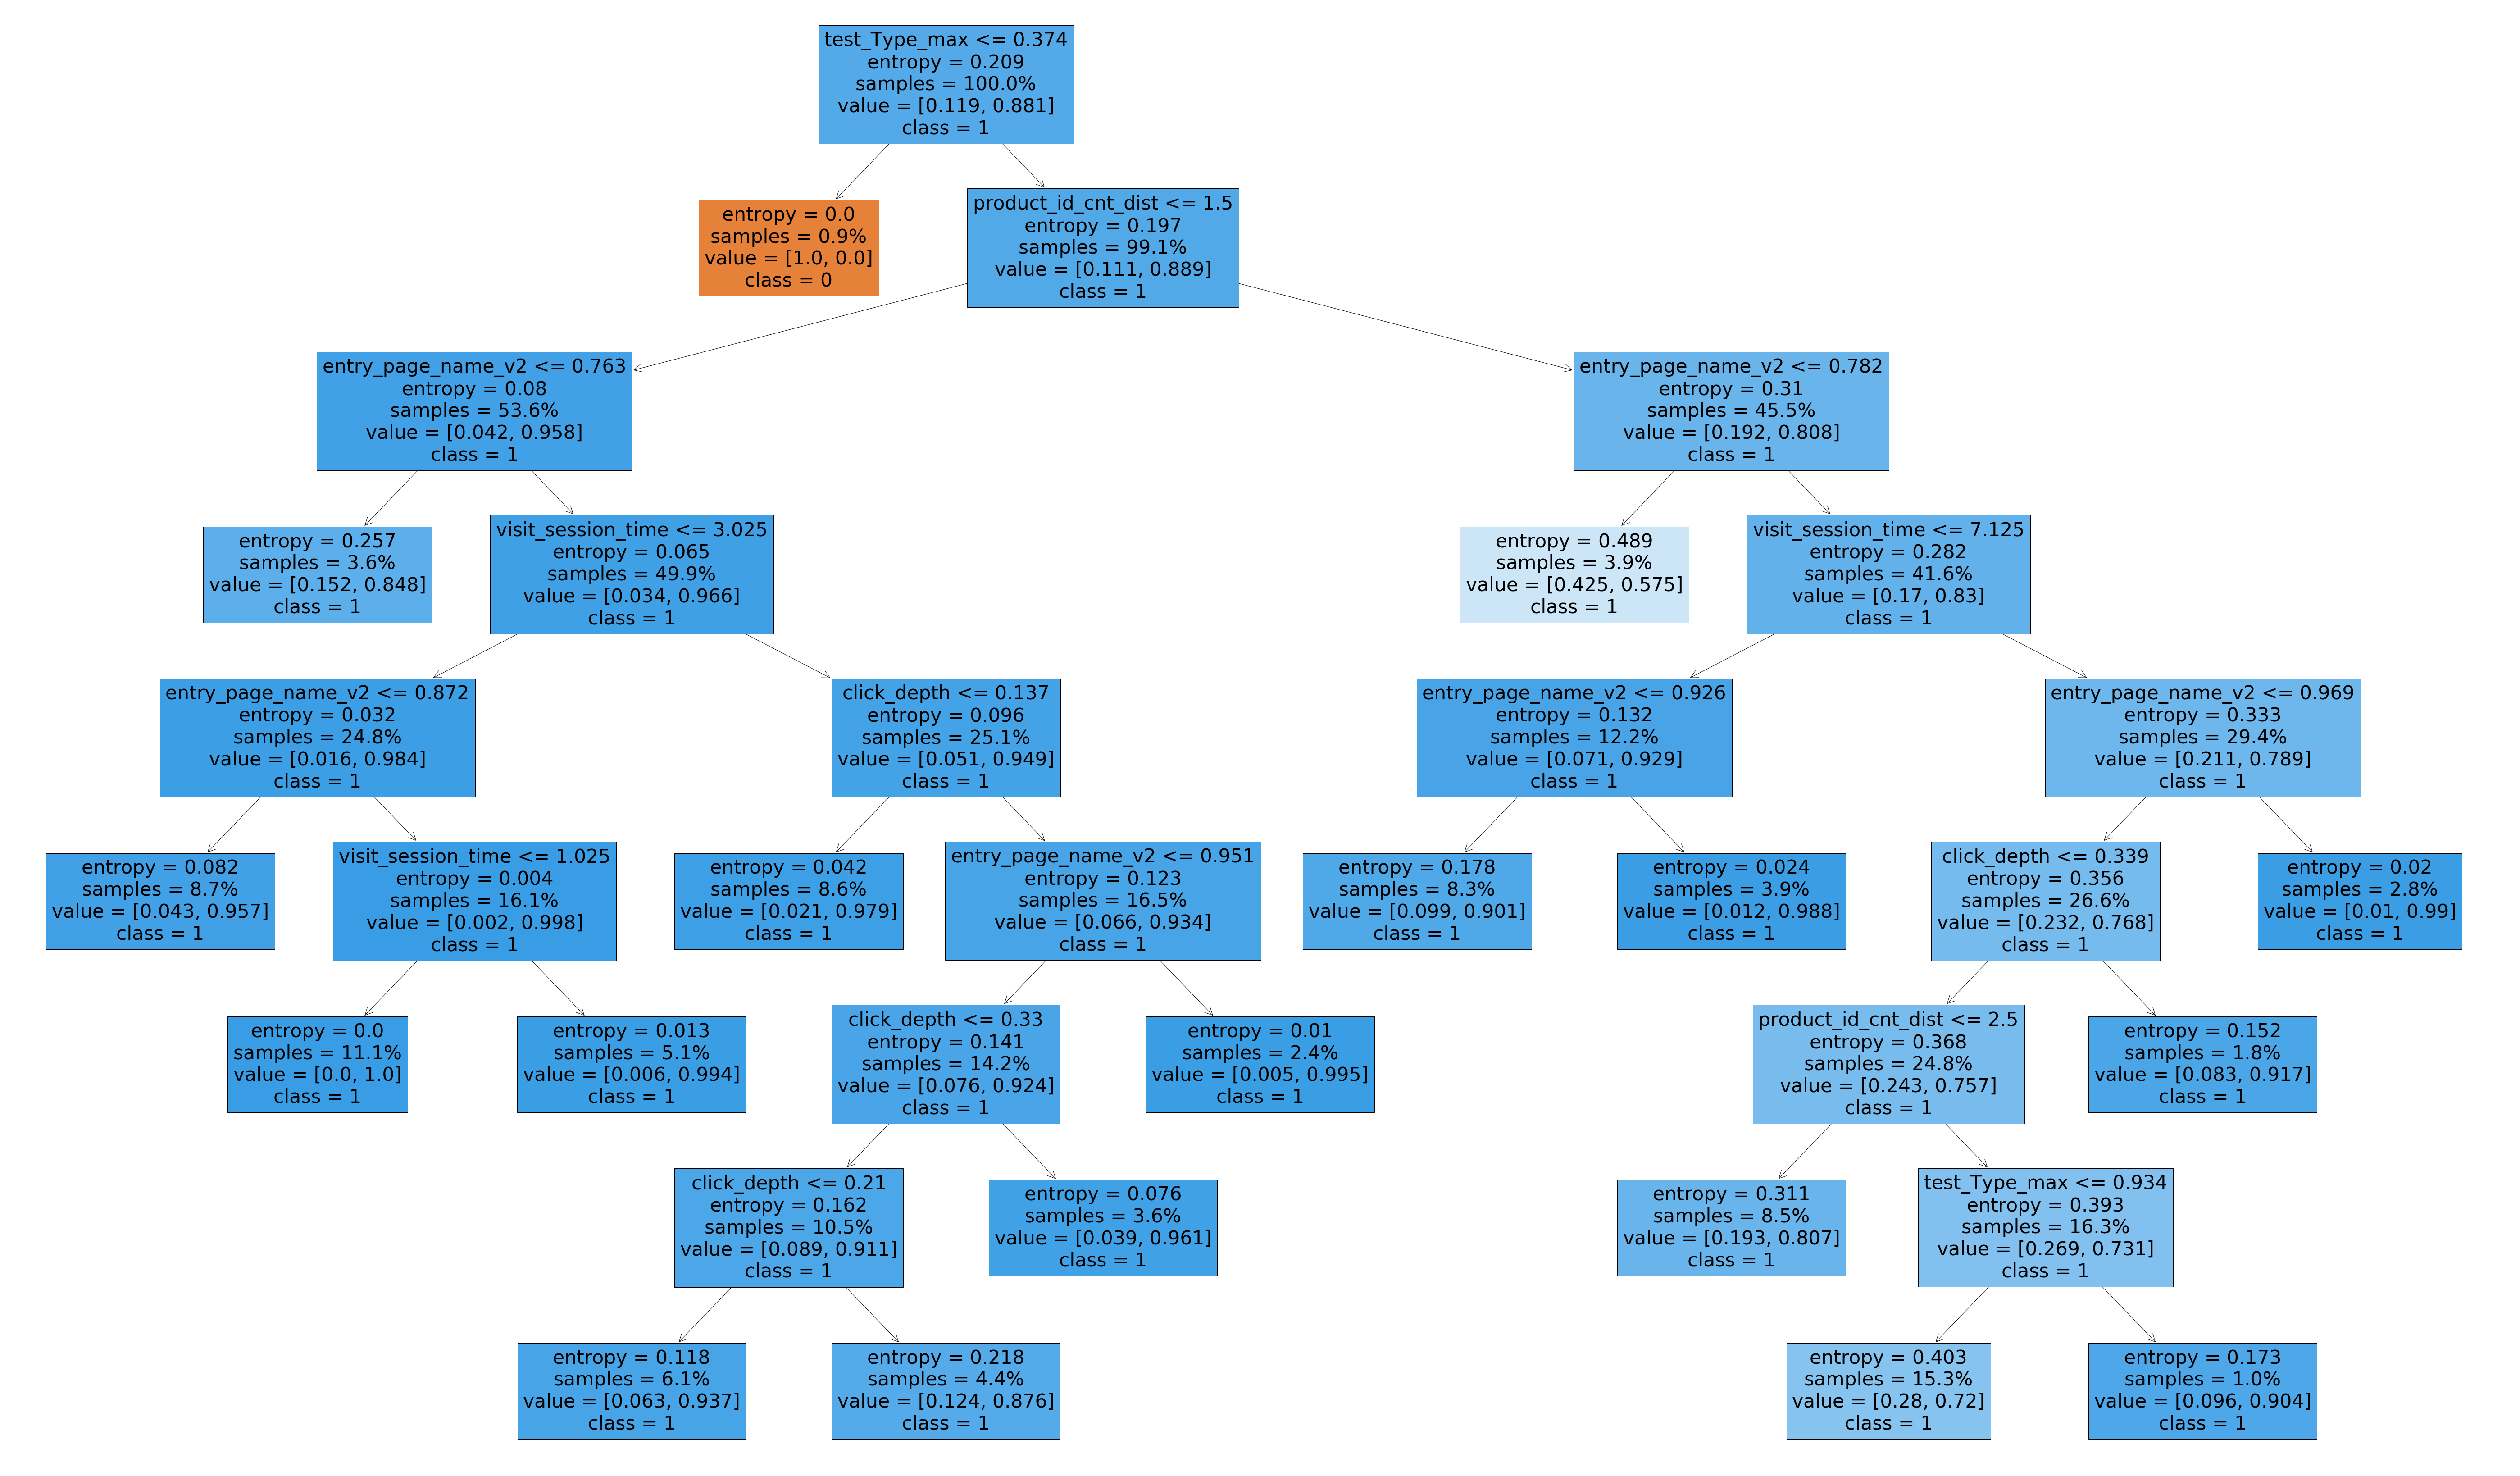

In [47]:
feature_imp_df['feature'][0:5].values

req_cols = ['visit_session_time', 'product_id_cnt_dist', 'click_depth', 'test_Type_max', 'entry_page_name_v2']

# Prepare the data data
X = X_train[req_cols]
y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)


In [68]:
X_train_data

checkout_cnt  checkout_exists  visit_session_time  product_id_cnt_dist  \
0                 0                0            1.100000                    1   
1                 2                1           31.116667                    1   
2                14                1           34.050000                    3   
3                 8                1           39.000000                    1   
4                32                1           51.050000                    7   
...             ...              ...                 ...                  ...   
25064            14                1           21.016667                    1   
25065             0                0            4.016667                    1   
25066             3                1           10.050000                    1   
25067             0                0            0.016667                    1   
25068             3                1            9.133333                    5   

       click_depth  cart_visit_cnt  exit_page_name_v2  product_id_max  \
0         0.200000               0           0.892242        0.666667   
1         0.127660               4           0.964688        0.894737   
2         0.118998              14           0.892242        0.891892   
3         0.178808               6           0.933649        0.904255   
4         0.142857              18           0.892242        0.912281   
...            ...             ...                ...             ...   
25064     0.194030               8           0.892242        0.931034   
25065     0.117647               0           0.892242        0.966006   
25066     0.138889               0           0.892242        0.839080   
25067     0.400000               0           0.892242        0.750000   
25068     0.240741              11           0.892242        0.904255   

       exit_link_cat  test_Type_max  exit_page_type  entry_page_name_v2  \
0           0.937888       0.842033        0.894641            0.666667   
1           0.767319       0.925915        0.824376            1.000000   
2           0.939012       0.842033        0.894641            0.872850   
3           0.939012       0.842033        0.952941            0.865406   
4           0.909814       0.963542        0.894641            0.865406   
...              ...            ...             ...                 ...   
25064       0.939012       0.842033        0.894641            0.886957   
25065       0.960729       0.925915        0.894641            0.985185   
25066       0.939012       0.925915        0.894641            0.872850   
25067       0.939012       0.925915        0.894641            0.666667   
25068       0.904762       0.842033        0.894641            0.878049   

       site_txmy2_max  nth_visit_of_visitor  referrer_max  
0            0.912292              0.854337      0.966559  
1            0.999205              0.842059      0.775890  
2            0.807240              0.859885      0.775890  
3            0.911782              0.837586      0.775890  
4            0.839080              1.000000      0.775890  
...               ...                   ...           ...  
25064        0.819196              0.822803      0.775890  
25065        0.911782              0.920635      0.966559  
25066        0.845552              0.828962      0.924043  
25067        0.911782              0.926471      0.992958  
25068        0.868421              0.842059      0.954545  

[25069 rows x 15 columns]

In [50]:
# pip install yellowbrick --user

In [51]:
# visualise class separation
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


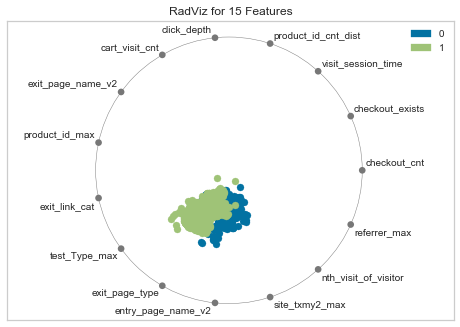

In [66]:
classes = ['0', '1']
features = X_train.columns
visualizer = RadViz(clases=classes, features=features)

X_matrix = X_train.values
y_matrix = y_train

y_matrix = np.array(y_matrix) 
y_matrix[np.array(y_train)==1] == 'abandoned'
y_matrix[np.array(y_train)==0] == 'Not_abandoned'

visualizer.fit(X_matrix, y_matrix)
visualizer.transform(X_matrix)
visualizer.poof()

### Fit Logistic Regression to understand the drection of influence of categories of variables

In [41]:
X_data[cat_vars].describe()

exit_page_name_v2  product_id_max  exit_link_cat  test_Type_max  \
count              35813           35813          35813          35813   
unique               711            2239            327              7   
top        Not available  SM-R177NZKAXAR  Not available  Not available   
freq               26216             851           9760          18728   

       exit_page_type entry_page_name_v2 site_txmy2_max nth_visit_of_visitor  \
count           35813              35813          35813                35813   
unique             58               1638            195                 1749   
top     Not available      Not available            tvs                    1   
freq            26709              10495           9767                 4856   

                          referrer_max  
count                            35813  
unique                             197  
top     https://www.uofl2022.org/us/we  
freq                             10415

In [42]:
#Can't run regression if we created too many dummies. So removing categorical variables which have too manycategories for simplicity

In [43]:
X_data_logistic = X_data[cont_vars + ['test_Type_max', 'exit_page_type', 'site_txmy2_max', 'referrer_max']]


In [44]:
X_data_logistic = pd.get_dummies(X_data_logistic)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_data_logistic, y_data , test_size = 0.3)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = list(y_train)
y_test=list(y_test)

print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(25069, 463) (10744, 463) 25069 10744


In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
pred_tr = logreg.predict(X_train)

accs = prt_acc(y_train, y_test, pred_tr, pred)


*******************
*******************
Accuracy Test 0.9033879374534624
precision Test 0.9147515222942447
Recall Test 0.9820750738085197
F1 Test 0.9472185497813485
*******************
Accuracy Train 0.9029877537995133
precision Train 0.9134235521560057
Recall Train 0.9831719895051118
F1 Train 0.9470152505446623


In [47]:
feature_imp=logreg.coef_ 
feature = X_train.columns
feature_imp_df = pd.DataFrame(feature)
feature_imp_df.columns = ['feature']
feature_imp_df['beta'] = list(feature_imp[0])
feature_imp_df['abs_beta'] = list(np.abs(feature_imp[0]))
feature_imp_df=feature_imp_df.sort_values('abs_beta', ascending=False).reset_index().drop(columns='index')

fts = list(feature_imp_df[0:5]["feature"].values)

temp=pd.DataFrame()
temp = temp.append([[mdl] + accs + fts], ignore_index=True)
print()
temp.columns = ["Model", "Train_accuracy","Train_precision","Train_recall", "Train_f1","Test_accuracy", 
                      "Test_precision","Test_recall", "Test_f1", "Top_1_explainer", "Top_2_explainer", "Top_3_explainer", "Top_4_explainer", "Top_5_explainer"]


fin_result = fin_result.append(temp)
fin_result

Model  Train_accuracy  Train_precision  Train_recall  Train_f1  \
0  rf_Target_enc        0.995293         0.995358      0.999321  0.997336   
0  rf_Target_enc        0.902988         0.913424      0.983172  0.947015   

   Test_accuracy  Test_precision  Test_recall   Test_f1  Top_1_explainer  \
0       0.950112        0.957112     0.987775  0.972202     checkout_cnt   
0       0.903388        0.914752     0.982075  0.947219  checkout_exists   

                 Top_2_explainer        Top_3_explainer  \
0              exit_page_name_v2          exit_link_cat   
0  test_Type_max_motopay_by_link  test_Type_max_motopay   

                      Top_4_explainer                        Top_5_explainer  
0                      product_id_max                        checkout_exists  
0  exit_page_type_my orders|my orders  referrer_max_https://www.verizon.com/

In [41]:
feature_imp_df[0:30].to_clipboard()

In [54]:
temp = feature_imp_df[feature_imp_df['beta']<0]

In [42]:
fin_result.to_clipboard()

In [55]:
temp

feature      beta  abs_beta
0                               checkout_exists -2.590885  2.590885
1                 test_Type_max_motopay_by_link -2.504069  2.504069
3            exit_page_type_my orders|my orders -1.605889  1.605889
4         referrer_max_https://www.verizon.com/ -1.133186  1.133186
7    site_txmy2_max_home-appliances-accessories -1.064279  1.064279
..                                          ...       ...       ...
264                     site_txmy2_max_us:pc:pc -0.007853  0.007853
269                    exit_page_type_undefined -0.007072  0.007072
272     exit_page_type_b2c|product explore page -0.006573  0.006573
277              site_txmy2_max_galaxy-a-series -0.005595  0.005595
325                       site_txmy2_max_tab-s7 -0.001521  0.001521

[90 rows x 3 columns]

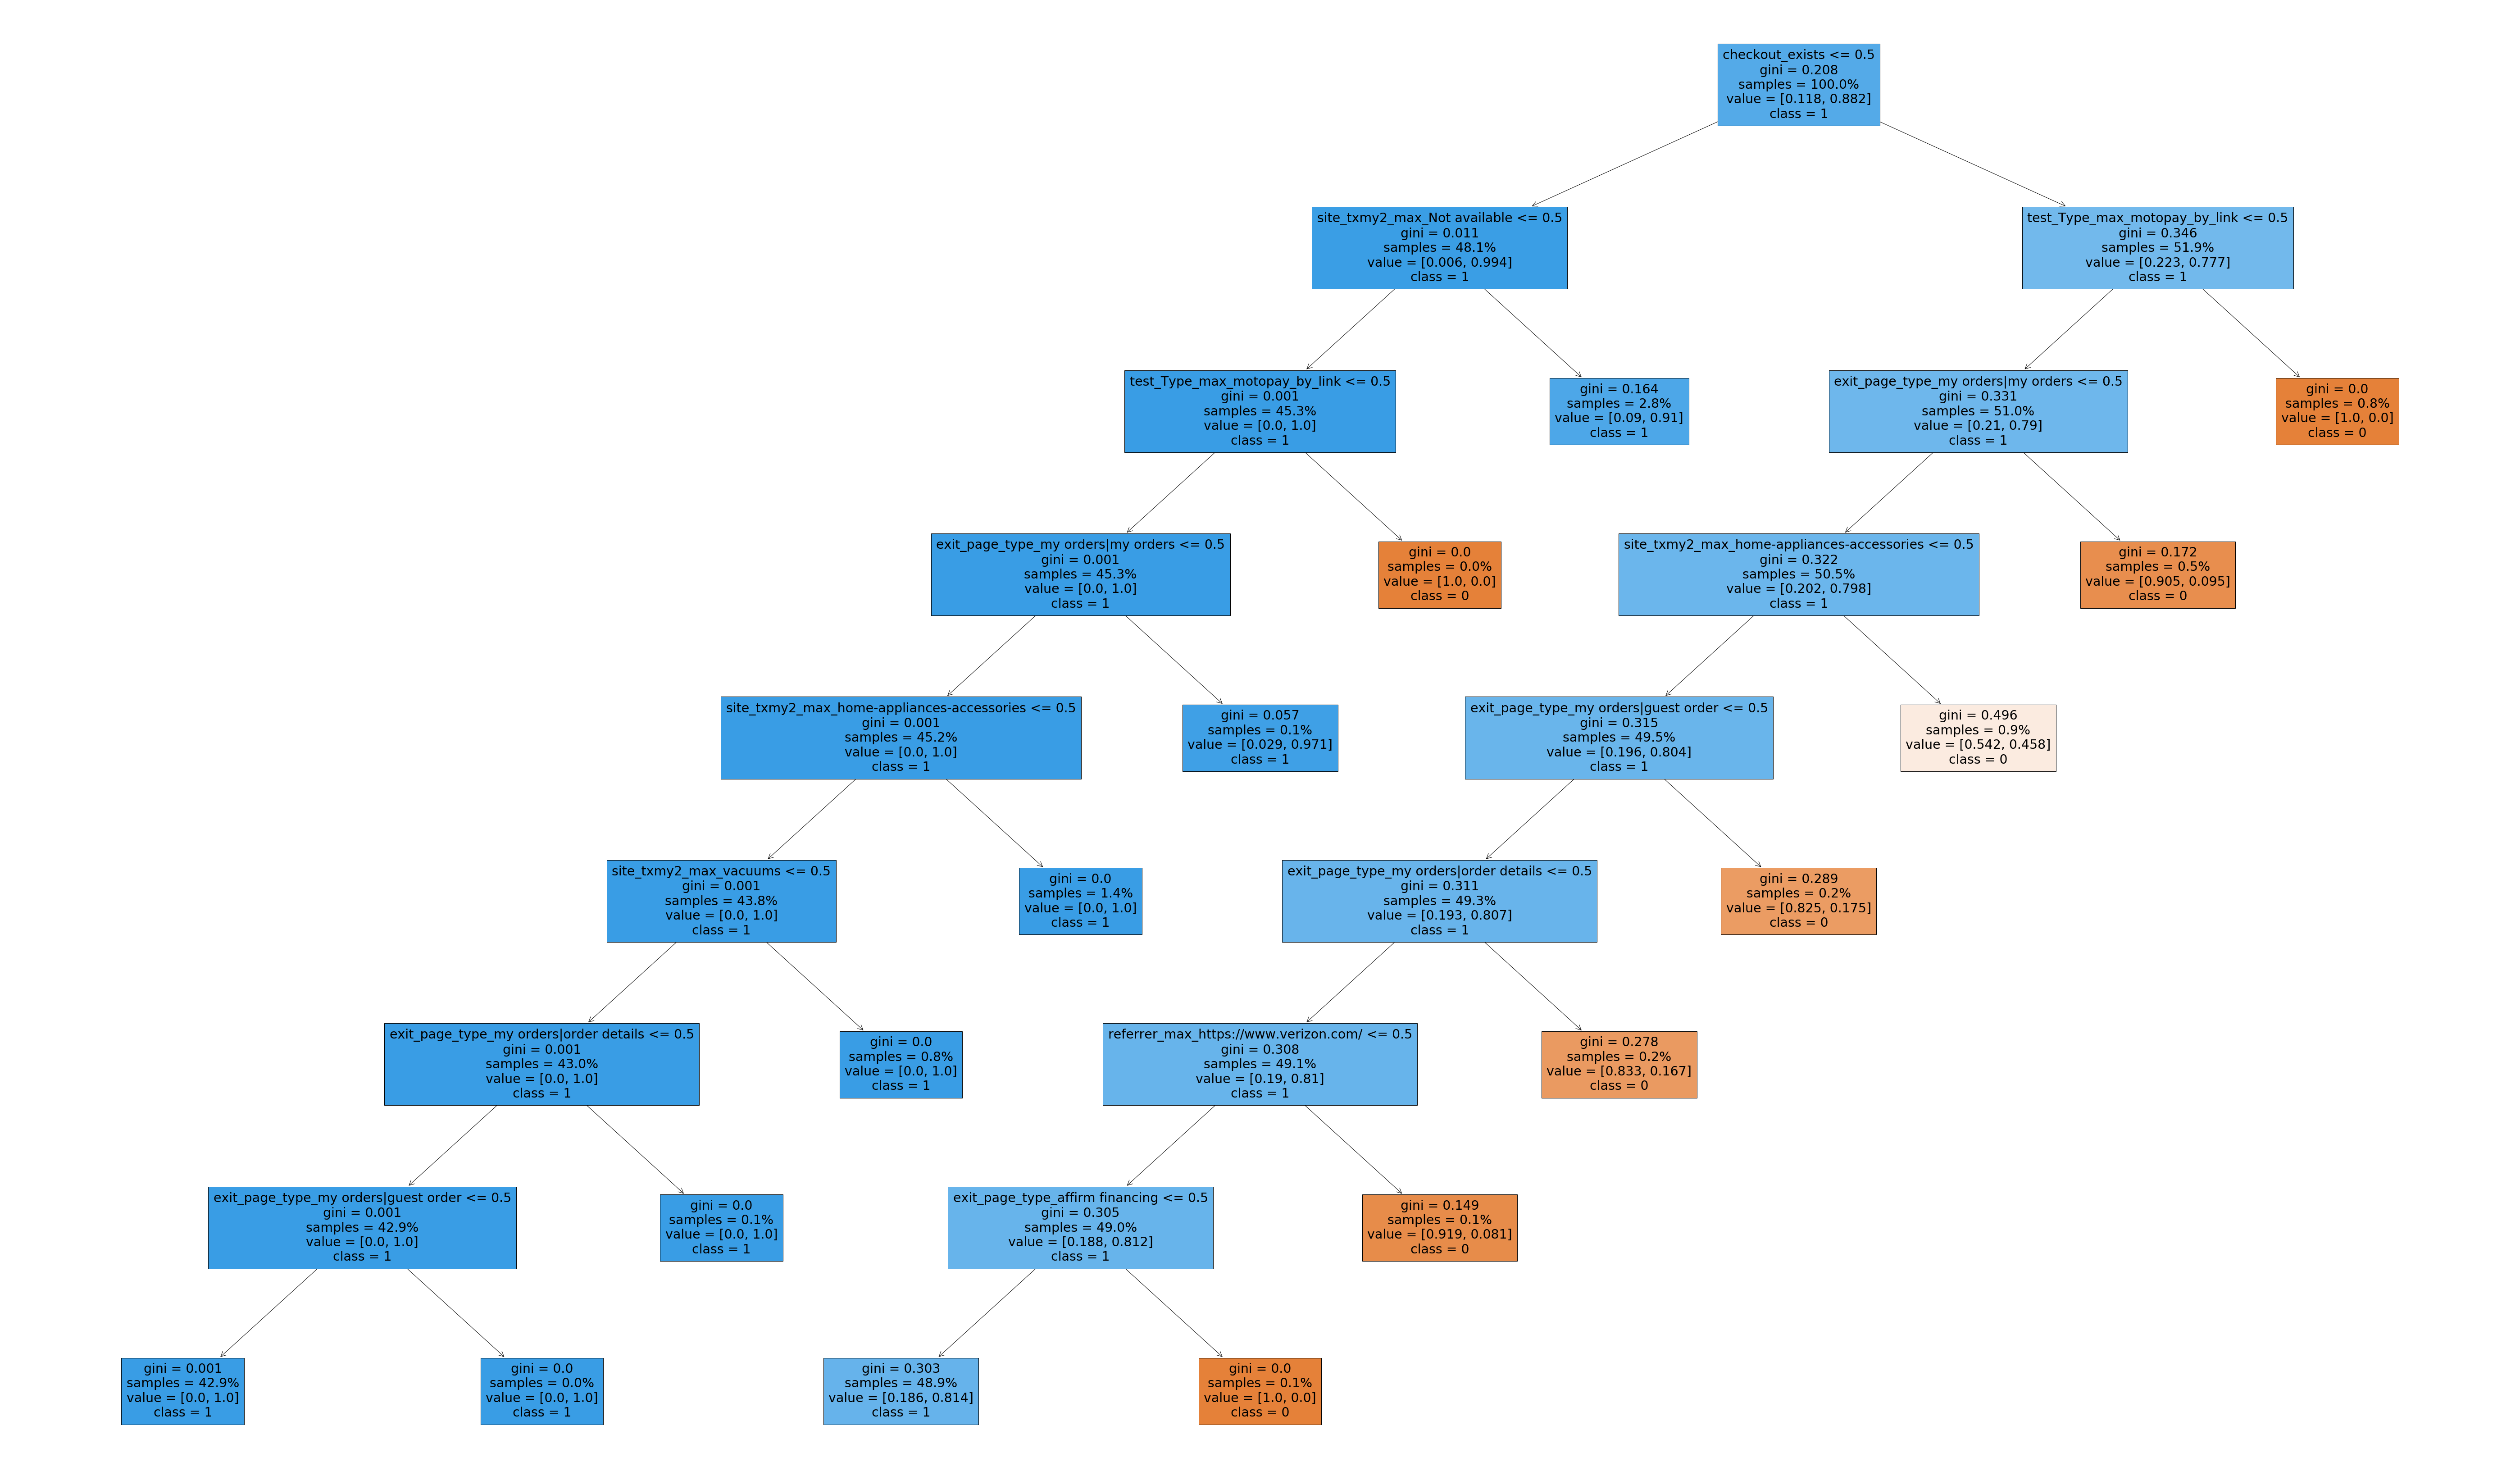

In [58]:

req_cols = temp['feature'][0:10].values

# Prepare the data data
X = X_train[req_cols]
y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)


In [87]:
temp = df[(df['site_txmy2_max']=='tvs') & (df['checkout_exists']==0)]
X = temp.copy()
X.describe(include='O')

exit_page_name_v2  product_id_max        exit_link_cat  test_Type_max  \
count               6517            6517                 6517           6517   
unique               138             621                  154              4   
top        Not available  SM-R177NZKAXAR  iadvize_chat_events  Not available   
freq                4694             590                 1903           4950   

       exit_page_type entry_page_name_v2 site_txmy2_max nth_visit_of_visitor  \
count            6517               6517           6517                 6517   
unique             28                513              1                  598   
top     Not available               home            tvs                    1   
freq             5043               1121           6517                  371   

         referrer_max  
count            6517  
unique            130  
top     Not available  
freq             1093

In [88]:
y = temp['target'].values

In [89]:
X = X[cont_vars + ['exit_page_name_v2', 'exit_link_cat', 'test_Type_max', 'exit_page_type']]

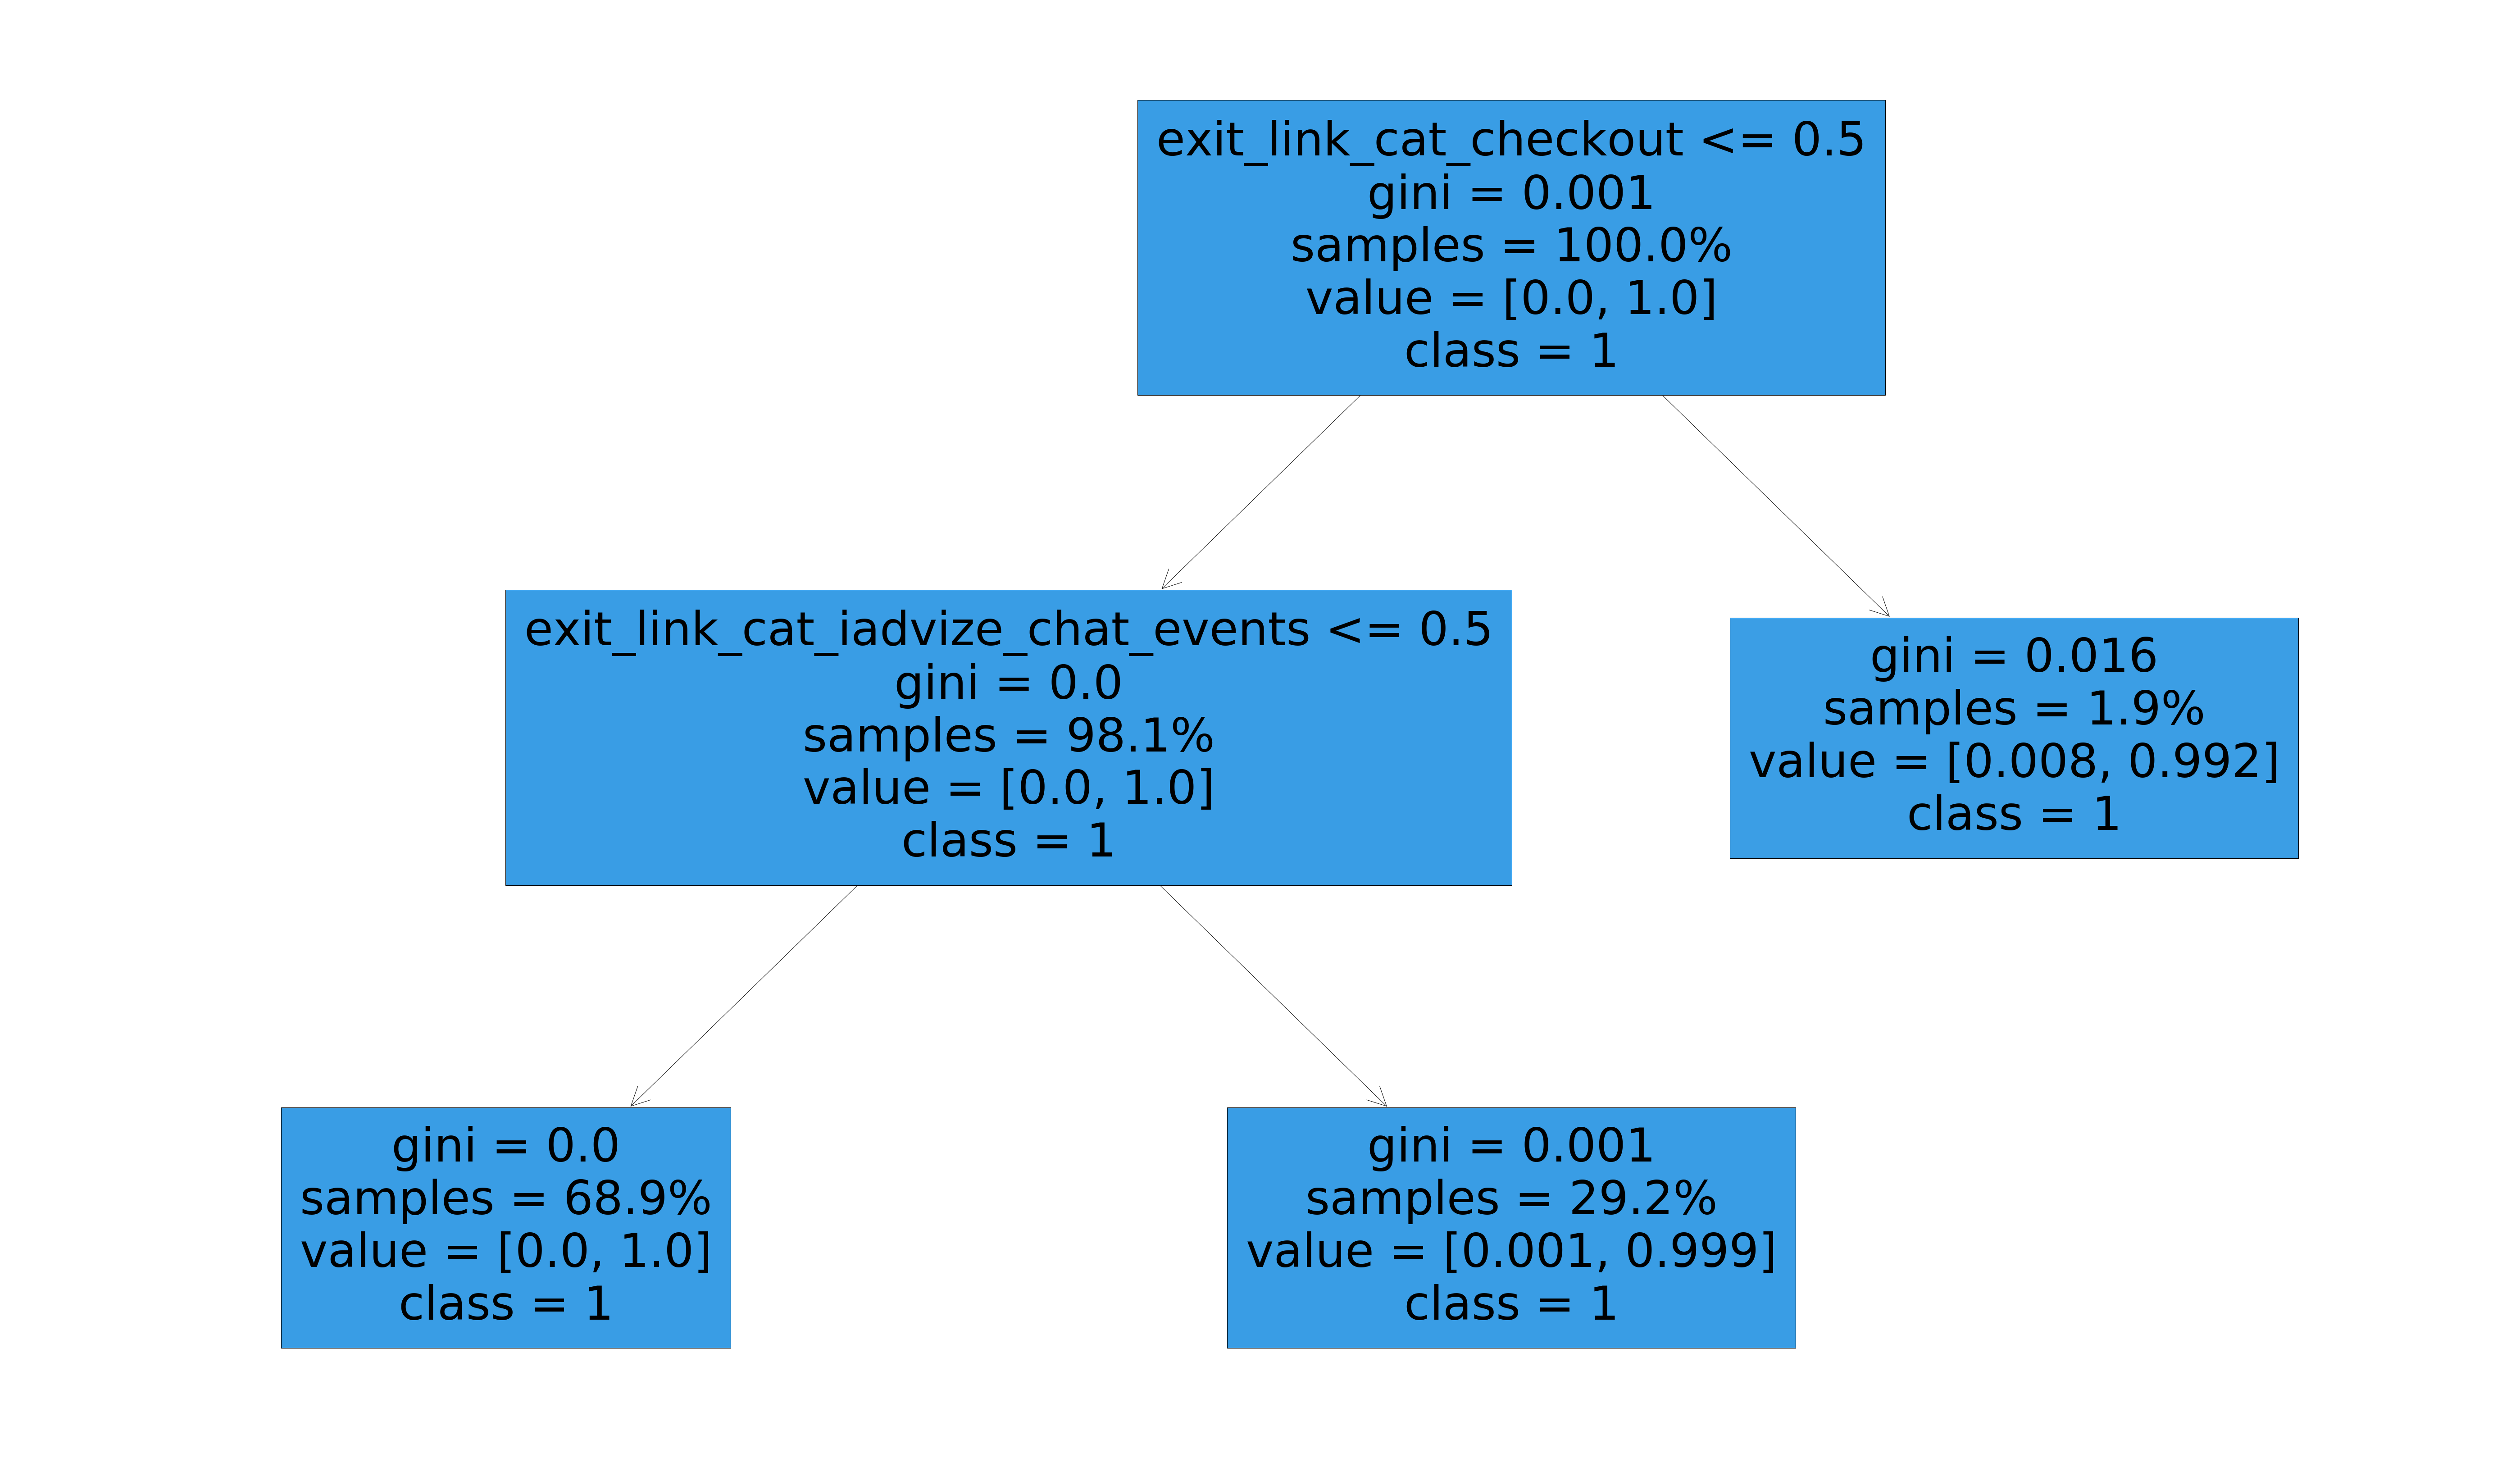

In [91]:

# req_cols = temp['feature'].values

# Prepare the data data
# X = X_train[req_cols]
# X['']
# y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)


In [107]:
temp = df[(df['site_txmy2_max']=='tvs') & (df['checkout_exists']==0)]
X = temp.copy()
X.describe(include='O')

exit_page_name_v2  product_id_max        exit_link_cat  test_Type_max  \
count               6517            6517                 6517           6517   
unique               138             621                  154              4   
top        Not available  SM-R177NZKAXAR  iadvize_chat_events  Not available   
freq                4694             590                 1903           4950   

       exit_page_type entry_page_name_v2 site_txmy2_max nth_visit_of_visitor  \
count            6517               6517           6517                 6517   
unique             28                513              1                  598   
top     Not available               home            tvs                    1   
freq             5043               1121           6517                  371   

         referrer_max  
count            6517  
unique            130  
top     Not available  
freq             1093

In [108]:
y = temp['target'].values

In [109]:
cont_vars

['checkout_cnt',
 'checkout_exists',
 'visit_session_time',
 'product_id_cnt_dist',
 'click_depth',
 'cart_visit_cnt']

In [110]:
X = X[cont_vars + ['exit_page_name_v2', 'test_Type_max']]

X = X.drop(columns=['click_depth', 'cart_visit_cnt', 'visit_session_time'])

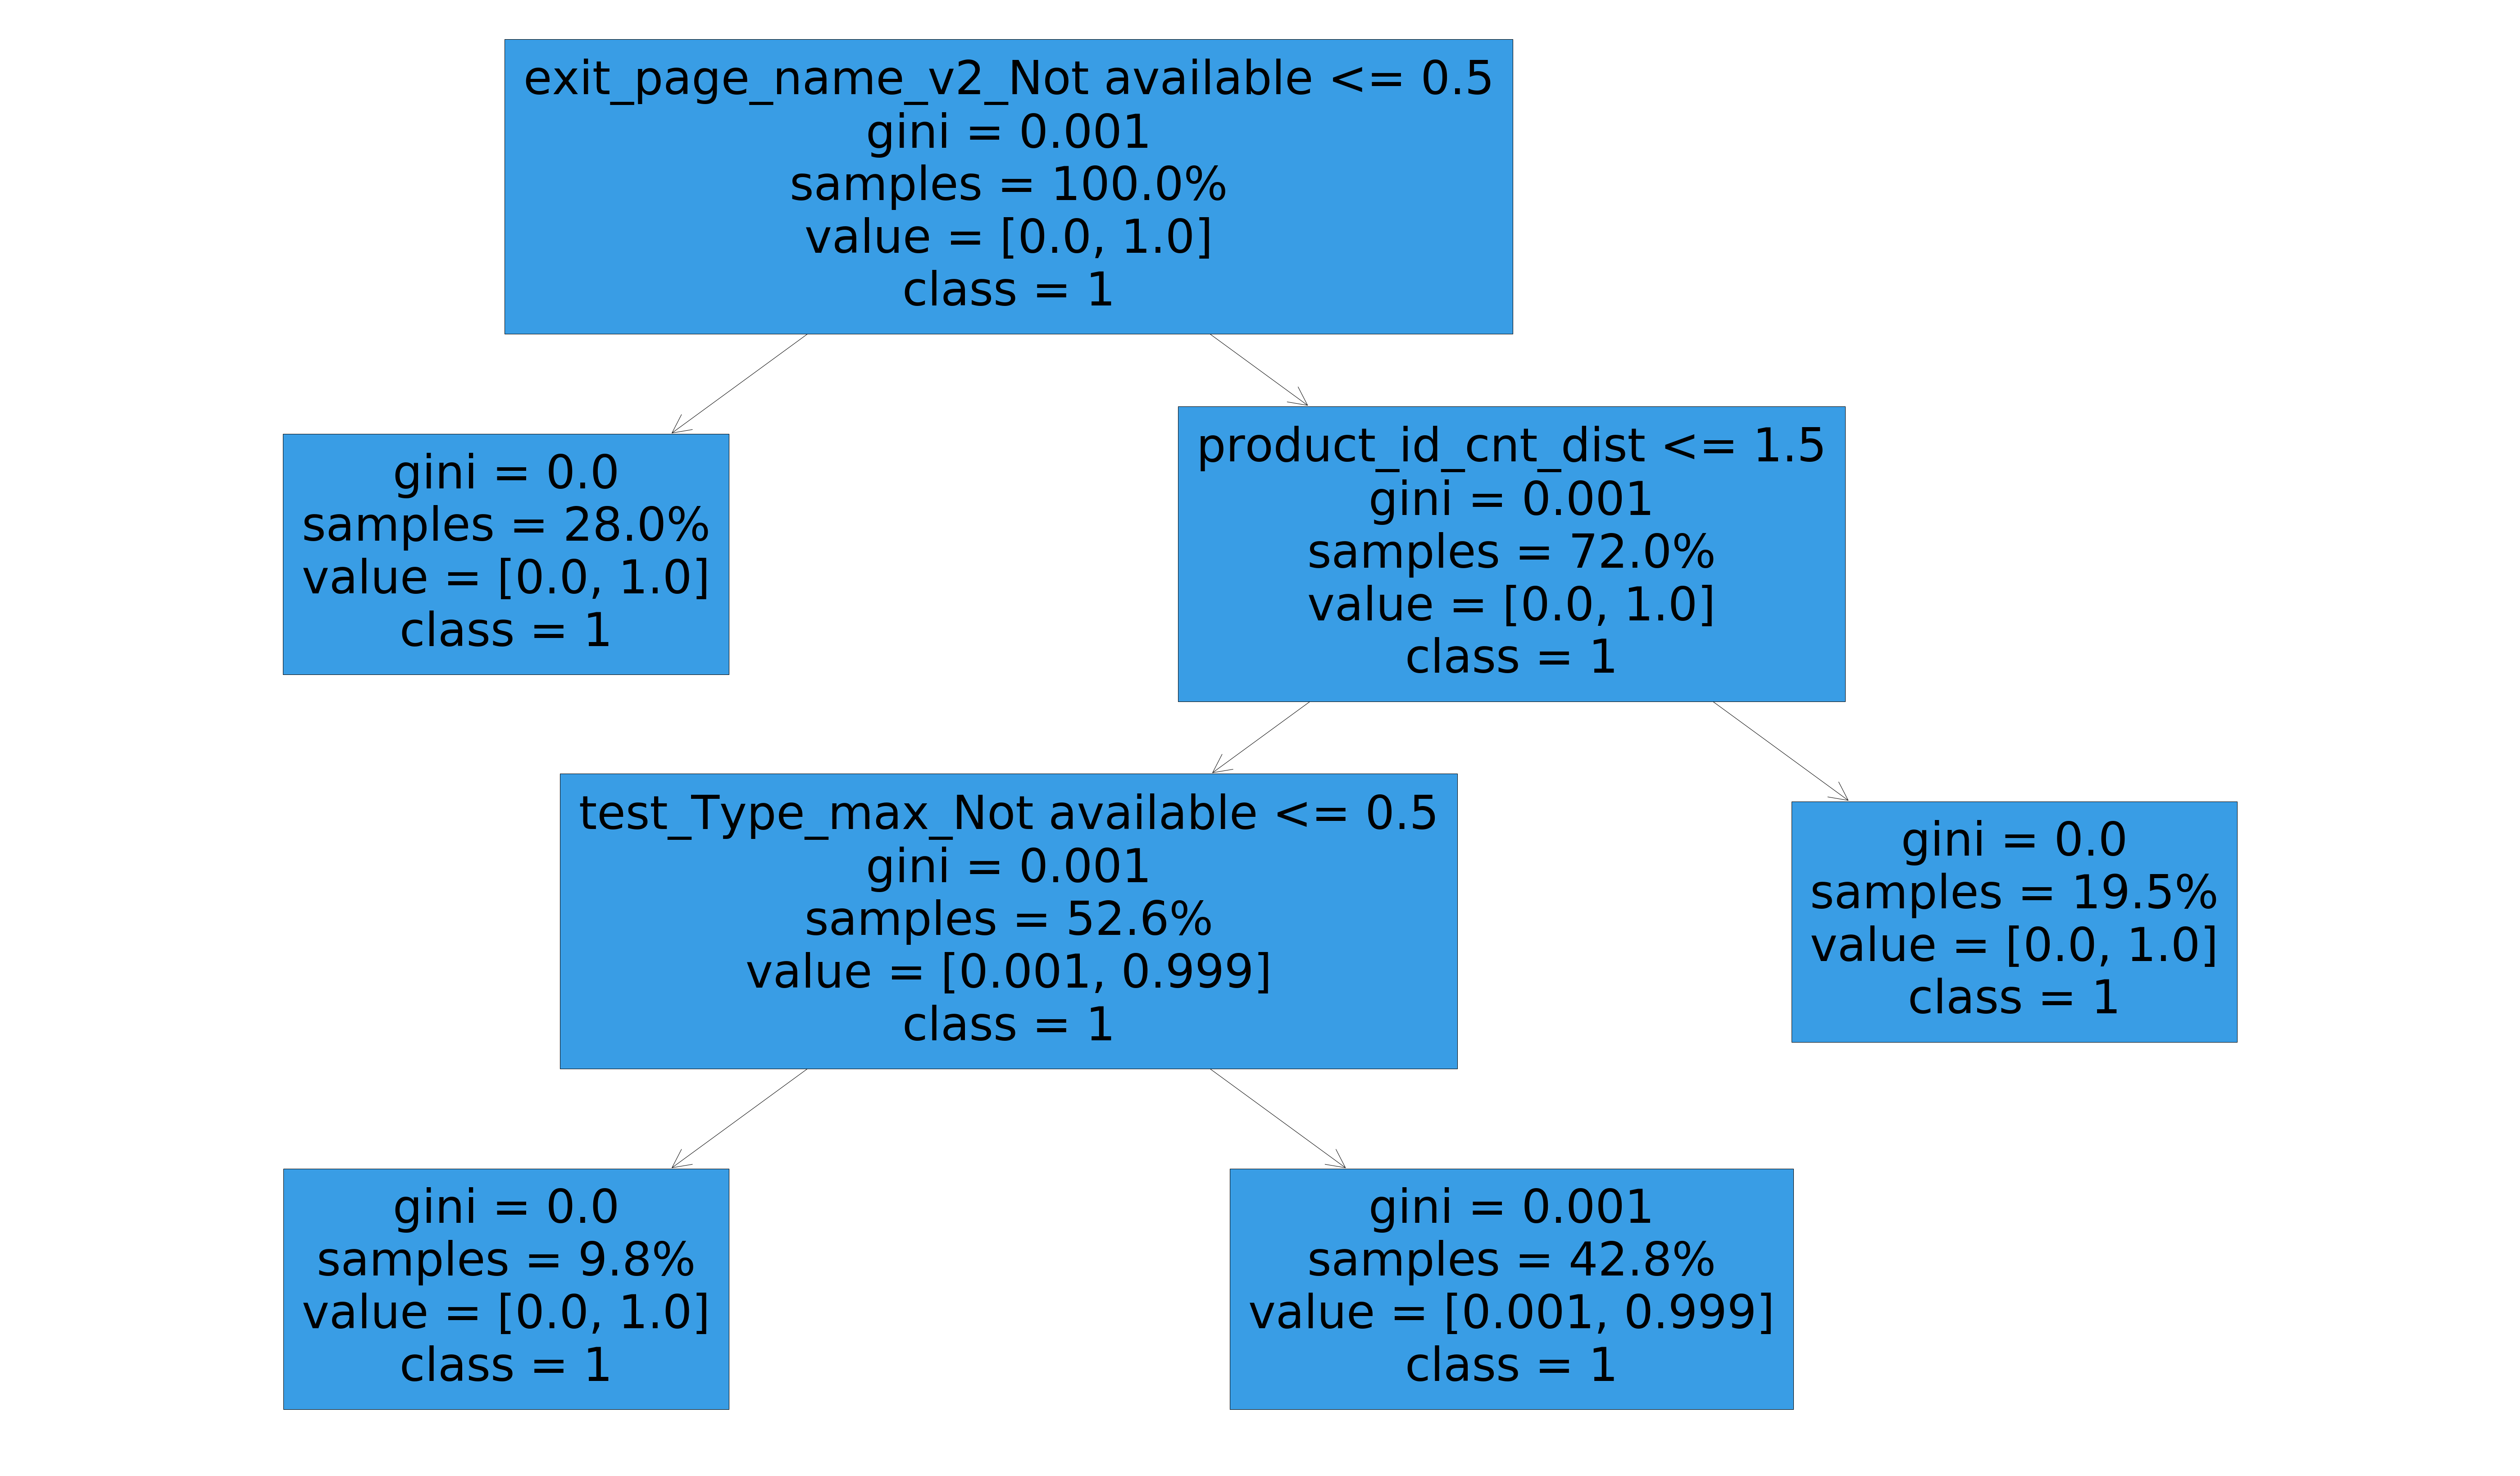

In [111]:

# req_cols = temp['feature'].values

# Prepare the data data
# X = X_train[req_cols]
# X['']
# y = y_train

X = pd.get_dummies(X)

len(X.columns)

min_samp = int(len(X_train)*0.1)

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234, max_depth=8, min_samples_split=min_samp)
model = clf.fit(X, y)

fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  proportion=True,
                   class_names=['0','1'],
                   filled=True)
